# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from citipy import citipy
import random
import pandas as pd
import json
from api_keys import (weather_api_key, g_key)
import requests
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import pprint
import urllib

cities_file = ("../output_data/cities.csv")
# cities_df = pd.read_csv(cities_file)
# cities_df

## Generate Cities List

In [2]:
cities = []
count = 0
latitude_longitude = []

# Create a set of random latitude and longitude combinations
Latitude = np.random.uniform(low=-90.000, high=90.000, size=1550)
Longitude = np.random.uniform(low=-180.000, high=180.000, size=1553)
latitude_longitude = zip(Latitude, Longitude)

# Identify nearest city for each latitude and longitude combinations
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        count = count + 1
len(cities)


625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = "25bc90a1196e6f153eece0bc0b0fc9eb"
appid = wkey
settings = {"units": "Standard", "appid": weather_api_key}
url = f"{url}appid={wkey}&units={units}"
city_data = []
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass


Processing Record 1 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vaini
Processing Record 2 of Set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro
City not found...
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia
Processing Record 4 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hobart
Processing Record 5 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=busselton
Processing Record 6 of Set 1 | oksfjord
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=oksfjord
Processing Record 7 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/w

Processing Record 3 of Set 2 | pangody
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pangody
Processing Record 4 of Set 2 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sentyabrskiy
City not found...
Processing Record 5 of Set 2 | charcas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=charcas
Processing Record 6 of Set 2 | tsiroanomandidy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tsiroanomandidy
Processing Record 7 of Set 2 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=torbay
Processing Record 8 of Set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20elizabeth
Processing Record 9 of Set 2 | beyneu
http

Processing Record 6 of Set 3 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lolua
City not found...
Processing Record 7 of Set 3 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=georgetown
Processing Record 8 of Set 3 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=raudeberg
Processing Record 9 of Set 3 | bintulu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bintulu
Processing Record 10 of Set 3 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=faanui
Processing Record 11 of Set 3 | yanaul
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yanaul
Processing Record 12 of Set 3 | dingli
http://api.openweathermap.org/data/2.5/

Processing Record 8 of Set 4 | mawlaik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mawlaik
Processing Record 9 of Set 4 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=souillac
Processing Record 10 of Set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=iqaluit
Processing Record 11 of Set 4 | orumiyeh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=orumiyeh
Processing Record 12 of Set 4 | antalaha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=antalaha
Processing Record 13 of Set 4 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=clyde%20river
Processing Record 14 of Set 4 | gien
http://api.openweathermap.org/data/2.5/weat

Processing Record 12 of Set 5 | hillsboro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hillsboro
Processing Record 13 of Set 5 | sakakah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sakakah
Processing Record 14 of Set 5 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hithadhoo
Processing Record 15 of Set 5 | tura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tura
Processing Record 16 of Set 5 | kutum
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kutum
Processing Record 17 of Set 5 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=katsuura
Processing Record 18 of Set 5 | labuhan
http://api.openweathermap.org/data/2.5/weather?appid=2

Processing Record 17 of Set 6 | charters towers
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=charters%20towers
Processing Record 18 of Set 6 | la rioja
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=la%20rioja
Processing Record 19 of Set 6 | leua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=leua
Processing Record 20 of Set 6 | cam ranh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cam%20ranh
Processing Record 21 of Set 6 | ozgon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ozgon
City not found...
Processing Record 22 of Set 6 | varna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=varna
Processing Record 23 of Set 6 | ixtapa
http://api.openweathermap

Processing Record 21 of Set 7 | airai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=airai
Processing Record 22 of Set 7 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lavrentiya
Processing Record 23 of Set 7 | camana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=camana
Processing Record 24 of Set 7 | bhor
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bhor
Processing Record 25 of Set 7 | diffa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=diffa
Processing Record 26 of Set 7 | fredericksburg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fredericksburg
Processing Record 27 of Set 7 | hammerfest
http://api.openweathermap.org/data/2.5/weather?

Processing Record 25 of Set 8 | marquette
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marquette
Processing Record 26 of Set 8 | bethanien
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bethanien
Processing Record 27 of Set 8 | zharkent
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zharkent
Processing Record 28 of Set 8 | ransang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ransang
Processing Record 29 of Set 8 | bizhbulyak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bizhbulyak
Processing Record 30 of Set 8 | hurghada
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hurghada
Processing Record 31 of Set 8 | umm durman
http://api.openweathermap.org/dat

Processing Record 30 of Set 9 | korla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=korla
Processing Record 31 of Set 9 | krasnoturansk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=krasnoturansk
Processing Record 32 of Set 9 | vryburg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vryburg
Processing Record 33 of Set 9 | inta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=inta
Processing Record 34 of Set 9 | turayf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=turayf
Processing Record 35 of Set 9 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aklavik
Processing Record 36 of Set 9 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=25b

Processing Record 34 of Set 10 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marawi
Processing Record 35 of Set 10 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=klaksvik
Processing Record 36 of Set 10 | pochutla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pochutla
Processing Record 37 of Set 10 | ayabe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ayabe
Processing Record 38 of Set 10 | nogliki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nogliki
Processing Record 39 of Set 10 | penzance
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=penzance
Processing Record 40 of Set 10 | la sarre
http://api.openweathermap.org/data/2.5/weather

Processing Record 37 of Set 11 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tiznit
Processing Record 38 of Set 11 | ambo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ambo
Processing Record 39 of Set 11 | sarangani
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sarangani
Processing Record 40 of Set 11 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pisco
Processing Record 41 of Set 11 | palafrugell
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=palafrugell
Processing Record 42 of Set 11 | ryazanskaya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ryazanskaya
Processing Record 43 of Set 11 | college
http://api.openweathermap.org/data/2.5/

Processing Record 39 of Set 12 | rafiganj
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rafiganj
Processing Record 40 of Set 12 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kangaatsiaq
Processing Record 41 of Set 12 | chilca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chilca
Processing Record 42 of Set 12 | beira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beira
Processing Record 43 of Set 12 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=turukhansk
Processing Record 44 of Set 12 | ambodifototra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ambodifototra
City not found...
Processing Record 45 of Set 12 | havre
http://ap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
city_data_pd = pd.DataFrame(city_data)
# city_data_pd.to_csv('..\output_data\City_Data.csv')
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,vaini,-21.20,-175.20,299.15,88,90,7.20,TO,1601431847
1,ushuaia,-54.80,-68.30,274.15,80,40,7.20,AR,1601431848
2,hobart,-42.88,147.33,290.37,55,75,8.20,AU,1601431844
3,busselton,-33.65,115.33,290.37,85,96,1.34,AU,1601431848
4,oksfjord,70.24,22.35,280.15,87,42,5.10,NO,1601431848


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.840314,15.274101,62.418604,73.523560,52.385689,7.398220,1.601428e+09
std,33.087686,88.105886,16.230291,20.711257,40.582381,5.033228,9.532656e+01
min,-54.800000,-175.200000,14.270000,1.000000,0.000000,0.270000,1.601427e+09
25%,-6.880000,-63.000000,50.090000,65.000000,3.000000,3.360000,1.601428e+09
50%,29.420000,21.550000,63.610000,78.000000,70.000000,6.130000,1.601428e+09
75%,48.550000,91.560000,76.100000,88.000000,92.000000,10.000000,1.601428e+09
max,78.220000,178.420000,97.000000,100.000000,100.000000,28.860000,1.601428e+09


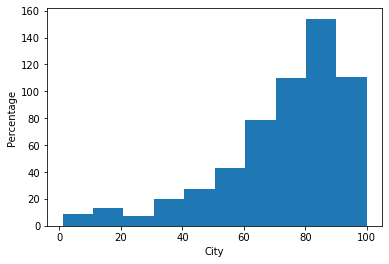

In [6]:
import scipy.stats as sts
plt.hist(city_data_pd['Humidity'])
plt.xlabel('City')
plt.ylabel('Percentage')
plt.show()

In [7]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = city_data_pd['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 65.0
The upper quartile of Humidity is: 88.0
The interquartile range of temperatures is: 23.0
The the median of temperatures is: 78.0 
Values below 30.5 could be outliers.
Values above 122.5 could be outliers.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.loc[(city_data_pd['Humidity'] > lower_bound) | (city_data_pd['Humidity'] < upper_bound)]
clean_city_data.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,0,vaini,-21.20,-175.20,80.60,83,90,14.99,TO,1601427529
1,1,ushuaia,-54.80,-68.30,33.80,80,40,13.87,AR,1601427529
2,2,hobart,-42.88,147.33,62.01,62,75,11.41,AU,1601427301
3,3,busselton,-33.65,115.33,62.01,82,99,10.42,AU,1601427530
4,4,oksfjord,70.24,22.35,44.60,93,45,13.87,NO,1601427530
...,...,...,...,...,...,...,...,...,...,...
568,568,general jose eduvigis diaz,-27.17,-58.42,80.60,44,99,9.17,PY,1601427728
569,569,barentu,15.11,37.59,73.40,55,36,5.61,ER,1601427545
570,570,aykhal,66.00,111.50,23.00,92,90,6.71,RU,1601427729
571,571,santiago de cao,-7.96,-79.24,60.93,89,44,10.13,PE,1601427729


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

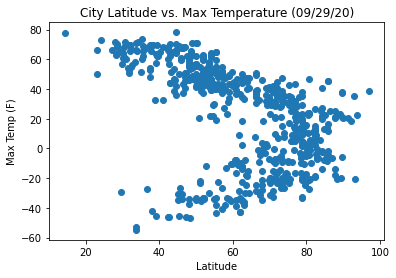

In [31]:
import time
plt.scatter(clean_city_data['Max Temp'],clean_city_data['Lat'])
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("..\output_data\Latitude vs Temperature (F).png")

## Latitude vs. Humidity Plot

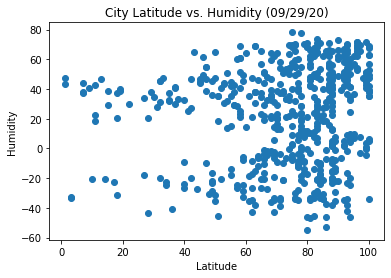

In [33]:
plt.scatter(clean_city_data['Humidity'],clean_city_data['Lat'])
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.savefig("..\output_data\Latitude vs Humidty.png")

## Latitude vs. Cloudiness Plot

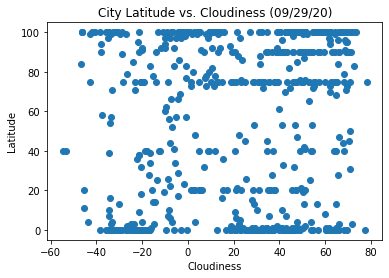

In [34]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Cloudiness")
plt.ylabel('Latitude')
plt.savefig("..\output_data\Latitude vs Cloudiness (%).png")

## Latitude vs. Wind Speed Plot

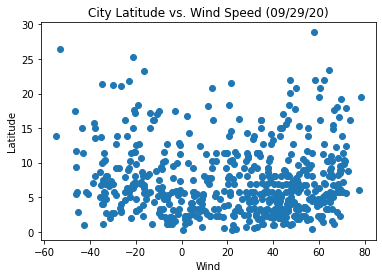

In [35]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind'])
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Wind")
plt.ylabel('Latitude')

plt.savefig("..\output_data\Latitude vs Wind Speed (MPH).png")

## Linear Regression

In [13]:
northern_city_data = city_data_pd.loc[(city_data_pd['Lat'] > 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8080648648705531


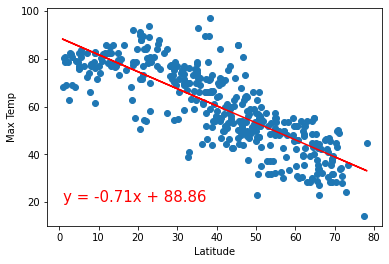

In [36]:
from scipy.stats import linregress
x_values = northern_city_data['Lat']
y_values = northern_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("..\output_data\Max Temp vs Latitude_Northern_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
southern_city_data = city_data_pd.loc[(city_data_pd['Lat'] < 0)]

The r-value is: 0.6733862829391858


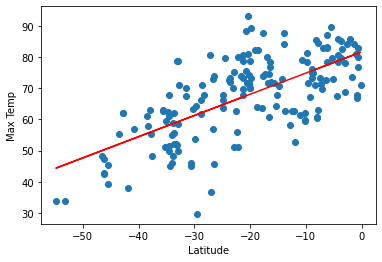

In [37]:
x_values = southern_city_data['Lat']
y_values = southern_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("..\output_data\Max Temp vs Latitude_Southern_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08604680588145706


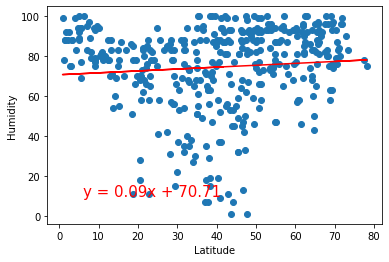

In [38]:
x_values = northern_city_data['Lat']
y_values = northern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("..\output_data\Humidity vs Latitude_Northern_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09823923934321857


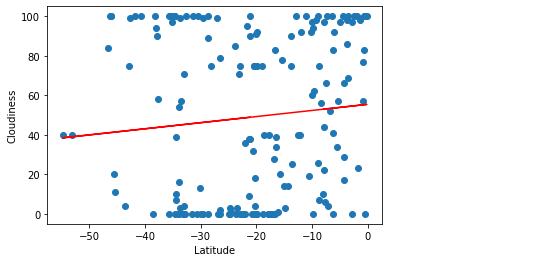

In [39]:
x_values = southern_city_data['Lat']
y_values = southern_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

plt.savefig("..\output_data\Cloudiness vs Latitude_Southern_Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08604680588145706


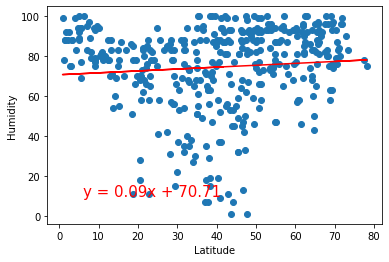

In [40]:
x_values = northern_city_data['Lat']
y_values = northern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("..\output_data\Humidity vs Latitude_Northern_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10823323989311864


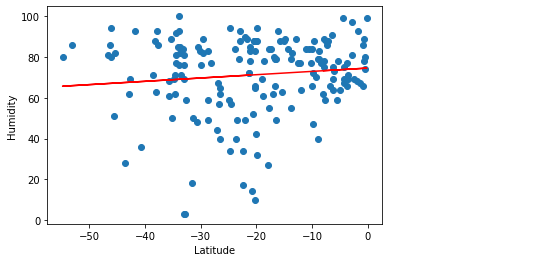

In [41]:
x_values = southern_city_data['Lat']
y_values = southern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

plt.savefig("..\output_data\Humidity vs Latitude_Southern_Regression.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08604680588145706


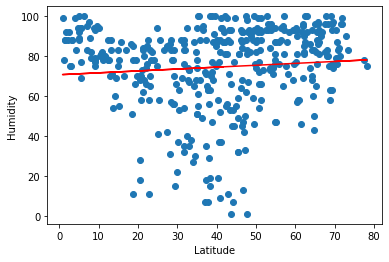

In [42]:
x_values = northern_city_data['Lat']
y_values = northern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("..\output_data\Wind vs Latitude_Northern_Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20223524080881936


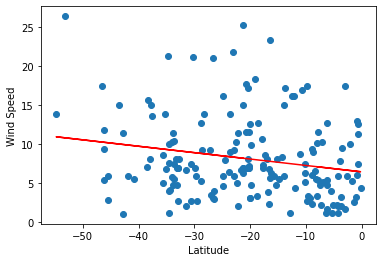

In [43]:
x_values = southern_city_data['Lat']
y_values = southern_city_data['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

plt.savefig("..\output_data\Wind vs Latitude_Southern_Regression.png")
